<a href="https://colab.research.google.com/github/bhagirathtallapragada/T-Natural-Language-Processing-CSC8980/blob/main/homework_4/tnlphw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bhagirath Tallapragada, panther id: 002575358

In [1]:
#Loading and unzipping the dataset

!unzip /content/sample_data/trainingandtestdata.zip -d /content/sample_data/

Archive:  /content/sample_data/trainingandtestdata.zip
  inflating: /content/sample_data/trainingandtestdata/testdata.manual.2009.06.14.csv  
  inflating: /content/sample_data/trainingandtestdata/training.1600000.processed.noemoticon.csv  


In [2]:
import os
import time
import pandas as pd
import numpy as np

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

1. Take the positive and the negative tweets only. Use Sklearn to split the dataset in 80%
training, 20% testing splits. Provide a nicely formatted summary of these splits,
containing their size) (15 points)

In [3]:
training_set=pd.read_csv('/content/sample_data/trainingandtestdata/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [4]:
training_set["polarity"].replace({4: 1}, inplace=True)
training_set=training_set.drop(['date','query','user'], axis=1)
training_set

,polarity,id,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,1,2193601966,Just woke up. Having no school is the best fee...
1599996,1,2193601969,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
#splitting 80% training and 20% test
train_a, test_a = train_test_split(training_set, test_size=0.20, random_state=2361)
print('*** Training data summary (80%) ***')
print(train_a.info())
print('\n')
print('*** Testing data summary (20%) ***')
print(test_a.info())

*** Training data summary (80%) ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280000 entries, 1474686 to 1561195
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1280000 non-null  int64 
 1   id        1280000 non-null  int64 
 2   text      1280000 non-null  object
dtypes: int64(2), object(1)
memory usage: 39.1+ MB
None


*** Testing data summary (20%) ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 402563 to 1311901
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  320000 non-null  int64 
 1   id        320000 non-null  int64 
 2   text      320000 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.8+ MB
None


2. Use the code from the previous classes to build the following models (15 points):
a) SVM using TF-IDF.
b) Naive Bayes using TF-IDF.
c) Random Forest using TF-IDF.

In [6]:
print(train_a.shape)
train_a.head()

(1280000, 3)


,polarity,id,text
1474686,1,2065768709,@scarlettstvitus It helps me to put a bag of i...
867725,1,1677825607,@tommcfly it's actually law of humans' life......
191053,0,1969494477,@ryanseacrest Son of a crap! I thought Adam L...
266955,0,1989094495,Alright folks I think I'm going to go try and ...
1472945,1,2065462631,loves that there's so much Federer love going ...


a) SVM using TF-IDF.

In [17]:
# testing on a subset:

train_sub=train_a.sample(n=10000).reset_index()
train_sub

,index,polarity,id,text
0,1055097,1,1962157605,Finds people's maturity levels fascinating. I...
1,1574791,1,2189294661,@xXFriendXx Mulan 2?! There's a 2? I must see ...
2,659514,0,2242177998,@shamir No. Unfortunately I don't think it'll ...
3,173741,0,1964156054,I am sucking with the abbreviation today. Sorr...
4,555916,0,2204166915,@TheFelixMolina this means I'll have to wait f...
...,...,...,...,...
9995,615166,0,2226168759,At the doc office
9996,1447113,1,2062582866,Blehh the last two nights have been the funnes...
9997,147788,0,1882924592,@livethelushlife Iï¿½m afraid I wonï¿½t be abl...
9998,521251,0,2192358662,Well 1st free movie of the year. Hmm going to ...


In [23]:
vectorizer = TfidfVectorizer()
v=vectorizer.fit_transform(train_sub['text'])

In [24]:
v.shape
# print(vectorizer.get_feature_names())

(10000, 18691)

In [20]:
# from sklearn.preprocessing import StandardScaler
# scaling = StandardScaler(with_mean=False).fit(v)
# # v = scaling.transform(v)

In [22]:
# n_estimators = 10
# start = time.time()
# classifier_a = OneVsRestClassifier(BaggingClassifier(SVC(probability=True, class_weight=None), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
# classifier_a.fit(v,train_sub['polarity'])
# end = time.time()
# print("Bagging SVC", end - start, classifier_a.score(v,train_sub['polarity']))

In [25]:
# from sklearn.preprocessing import StandardScaler
n_estimators = 10
model_a = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), OneVsRestClassifier(BaggingClassifier(SVC(probability=True, class_weight=None), max_samples=1.0 / n_estimators, n_estimators=n_estimators)))
model_a.fit(train_sub['text'],train_sub['polarity'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                                                                    coef0=0.0,
                                                                                    decision_function_shape='ovr',
                                                                                    degree=3

In [28]:
svm_labels = model_a.predict(test_a['text'])

In [31]:
print('*** Evaluation of Model a ***')
print('Precision:', sklearn.metrics.precision_score(test_a['polarity'],svm_labels))
print('Recall:', sklearn.metrics.recall_score(test_a['polarity'],svm_labels))
print('F1 Score:', sklearn.metrics.f1_score(svm_labels, test_a['polarity'], average='macro'))
print('***')

*** Evaluation of Model a ***
Precision: 0.550242945790891
Recall: 0.23497831277109035
F1 Score: 0.47866716228879025
***


In [32]:
svm_prec=sklearn.metrics.precision_score(test_a['polarity'],svm_labels)
svm_rec=sklearn.metrics.recall_score(test_a['polarity'],svm_labels)
svm_f1=sklearn.metrics.f1_score(svm_labels, test_a['polarity'], average='macro')
svm_met=[svm_prec, svm_rec, svm_f1]
svm_met

[0.550242945790891, 0.23497831277109035, 0.47866716228879025]

b) Naive Bayes using TF-IDF. 

In [7]:
print(train_a.shape)
train_a.head()

(1280000, 3)


,polarity,id,text
1474686,1,2065768709,@scarlettstvitus It helps me to put a bag of i...
867725,1,1677825607,@tommcfly it's actually law of humans' life......
191053,0,1969494477,@ryanseacrest Son of a crap! I thought Adam L...
266955,0,1989094495,Alright folks I think I'm going to go try and ...
1472945,1,2065462631,loves that there's so much Federer love going ...


In [8]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(train_a['text'])
y=train_a['polarity'].values
print(type(y))

<class 'numpy.ndarray'>


In [9]:
print(X.shape)

(1280000, 589763)


In [10]:
model_c=MultinomialNB()
model_c.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
yt=vectorizer.transform(test_a['text'])
nb_labels=model_c.predict(yt)

In [12]:
print('*** Evaluation of Model c ***')
print('Precision:', sklearn.metrics.precision_score(test_a['polarity'],nb_labels))
print('Recall:', sklearn.metrics.recall_score(test_a['polarity'],nb_labels))
print('F1 Score:', sklearn.metrics.f1_score(nb_labels, test_a['polarity'], average='macro'))
print('***')

*** Evaluation of Model c ***
Precision: 0.8003435127614991
Recall: 0.7280783990200123
F1 Score: 0.7727589595936349
***


In [14]:
nb_prec=sklearn.metrics.precision_score(test_a['polarity'],nb_labels)
nb_rec=sklearn.metrics.recall_score(test_a['polarity'],nb_labels)
nb_f1=sklearn.metrics.f1_score(nb_labels, test_a['polarity'], average='macro')
nb_met=[nb_prec, nb_rec, nb_f1]
nb_met

[0.8003435127614991, 0.7280783990200123, 0.7727589595936349]

c) Random Forest using TF-IDF. 

In [33]:
model_b = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), RandomForestClassifier())
model_b.fit(train_sub['text'],train_sub['polarity'])

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [34]:
rf_labels = model_b.predict(test_a['text'])

In [ ]:
print('*** Evaluation of Model c ***')
print('Precision:', sklearn.metrics.precision_score(test_sub['polarity'],labels_c))
print('Recall:', sklearn.metrics.recall_score(test_sub['polarity'],labels_c))
print('F1 Score:', sklearn.metrics.f1_score(labels_c, test_sub['polarity'], average='macro'))
print('***')

In [35]:
rf_prec=sklearn.metrics.precision_score(test_a['polarity'],rf_labels)
rf_rec=sklearn.metrics.recall_score(test_a['polarity'],rf_labels)
rf_f1=sklearn.metrics.f1_score(rf_labels, test_a['polarity'], average='macro')
rf_met=[rf_prec, rf_rec, rf_f1]
rf_met

[0.7398416410573584, 0.7177160285496431, 0.7326059366887618]

3. Use the code from the LSTM class to build a classifier for negative and positive
sentiment tweets. Train the model with the training data split. Once the model is built,
test it with the testing data split. Display the classifier report for this evaluation. Answer
the following question: What can you say about the performance of this model? (40
points)

In [7]:
# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence

from numpy import array

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

In [8]:
training_2=training_set.loc[(training_set['polarity']==0) | (training_set['polarity']==4)]
training_2=training_2.drop(['date','query','user'], axis=1)
train_a, test_a = train_test_split(training_2, test_size=0.20, random_state=2361)
train_a.shape

(1280000, 3)

In [9]:
X=list(train_a['text'].values)
# X=[[el] for el in X]
print(X[60])

allreviews = np.concatenate((train_a['text'], test_a['text']), axis=0)
allreviews=allreviews.tolist()
# print(allreviews[:3])

@internacionalj whatever dawg just leave 


In [10]:
from keras.preprocessing.text import Tokenizer
enc=[]
tokenizer=Tokenizer(filters='')
tokenizer.fit_on_texts(X)

enc=tokenizer.texts_to_sequences(X)

In [11]:
print(enc[60])

[84847, 1203, 18892, 20, 345]


In [12]:
# Looking at max review length and vocab size in training data
vocab_size = len(tokenizer.word_index) + 1
print("vocab size {}".format(vocab_size))

max_review_len = len(max((enc), key=len))

print("Maximum review length: {}".format(len(max((enc), key=len))))
print("Minimum review length: {}".format(len(min((enc), key=len))))
result = [len(x) for x in enc]
print("Mean review length: {}".format(np.mean(result)))

vocab size 1017110
Maximum review length: 57
Minimum review length: 1
Mean review length: 13.17442265625


In [13]:
# maxlen = max_review_len
X= sequence.pad_sequences(enc, maxlen=max_review_len)

In [14]:
X[60]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0, 84847,  1203,
       18892,    20,   345], dtype=int32)

In [15]:
train_a.insert(3,"encoded_list", X.tolist())
train_a["polarity"].replace({4: 1}, inplace=True)
train_a

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,polarity,id,text,encoded_list
1474686,1,2065768709,@scarlettstvitus It helps me to put a bag of i...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
867725,1,1677825607,@tommcfly it's actually law of humans' life......,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
191053,0,1969494477,@ryanseacrest Son of a crap! I thought Adam L...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
266955,0,1989094495,Alright folks I think I'm going to go try and ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1472945,1,2065462631,loves that there's so much Federer love going ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
416808,0,2061386238,@thisisbree I feel your pain.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1216020,1,1989600398,@mileycyrus http://twitpic.com/6dvj4 - love yo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1574656,1,2189269465,@Milereb Just agreed with my boss that I can l...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1569435,1,2188398571,@Helloself Hi!I I'm now following your. Lookin...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
print(train_a['encoded_list'][1474686])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 287000, 11, 2189, 17, 2, 296, 4, 1517, 12, 584, 13, 655, 12, 5, 339, 2, 6043, 118, 32448, 11, 13543, 1, 87, 7, 94, 142, 1683, 14532]


In [17]:
var=tokenizer.sequences_to_texts([train_a['encoded_list'][1474686]])
print(var)

['@scarlettstvitus it helps me to put a bag of ice on top of my head to relieve bad headaches! it helps! i hope you feel better soon, scar']


In [18]:
# designing the LSTM model
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = max_review_len # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 57, 32)            32547520  
_________________________________________________________________
dropout (Dropout)            (None, 57, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 32,555,873
Trainable params: 32,555,873
Non-trainable params: 0
_________________________________________________________________


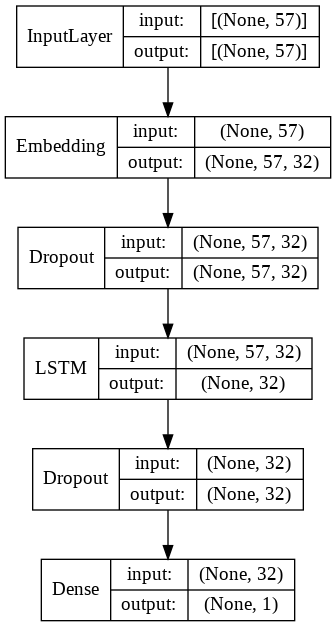

In [19]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [20]:
y=train_a['polarity'].values
print(len(y))
print(y[:5])

1280000
[1 1 0 0 1]


In [21]:
history = model.fit(
    x=X, y=y,
    batch_size=500, 
    epochs=3, 
    validation_split=0.2,
    verbose=1
)

Epoch 1/3
2048/2048 [==============================] - 814s 397ms/step - loss: 0.4965 - accuracy: 0.7536 - val_loss: 0.4090 - val_accuracy: 0.8117
Epoch 2/3
2048/2048 [==============================] - 810s 396ms/step - loss: 0.3269 - accuracy: 0.8589 - val_loss: 0.4288 - val_accuracy: 0.8046
Epoch 3/3
2048/2048 [==============================] - 809s 395ms/step - loss: 0.2248 - accuracy: 0.9094 - val_loss: 0.4765 - val_accuracy: 0.7966


In [24]:
# getting the test data

y_=list(test_a['text'].values)
enc_2 = tokenizer.texts_to_sequences(y_)
enc_2 = sequence.pad_sequences(enc_2, maxlen=max_review_len)
print(enc_2[0])

test_a["polarity"].replace({4: 1, 0: 0}, inplace=True)
yt=test_a['polarity'].values

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
  40   2 179  39 141   4  43  12 300  53  34 236  30   1  80   2  44  61
  84  53 129]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [25]:
from sklearn.metrics import classification_report
class_names = ["Negative", "Positive"]
predicted_classes = model.predict_classes(enc_2)
print(classification_report(yt, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.78      0.83      0.81    159998
    Positive       0.82      0.76      0.79    160002

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [27]:
# Storing the metrics for later comparison

print('*** Evaluation of LSTM Model 1***')
precision_lstm1=sklearn.metrics.precision_score(yt,predicted_classes)
recall_lstm1=sklearn.metrics.recall_score(yt,predicted_classes)
f1_score_lstm1=sklearn.metrics.f1_score(predicted_classes, yt, average='macro')
print(precision_lstm1)
print(recall_lstm1)
print(f1_score_lstm1)
print('***')
lstm_met=[precision_lstm1, recall_lstm1, f1_score_lstm1]
lstm_met

*** Evaluation of Model c ***
0.8209127594287364
0.764121698478769
0.7984684144190074
***


Observation: The LSTM model performs better than the previous models. In comparison to SVM and RandomForest Classifier, it also trains in a relatively less time implying better scalability with larger data. Further comparison of metrics given in Q4.

4. Compare all models together in terms of Precision, Recall and F1 score. Put all of
these numbers in a nicely formatted dataframe. Answer the following questions: Which
model performs the best? Why do you think this is? What do you think you can do to
improve performance? (30 points)


In [39]:
dict1 = {'SVC()': svm_met, 'MultinomialNB()': nb_met, 'RandomForestClassifier()': rf_met, 'LSTM': lstm_met}
metric_df= pd.DataFrame(dict1, index=['precision','recall', 'F1 Score'])
metric_df

,SVC(),MultinomialNB(),RandomForestClassifier(),LSTM
precision,0.550243,0.800344,0.739842,0.820913
recall,0.234978,0.728078,0.717716,0.764122
F1 Score,0.478667,0.772759,0.732606,0.798468


Observation:
*This analysis does not fully include the SVM and Random forest classifiers as both the models were still training over the full training set at the time of submission. However few insights will be pointed out in regards to scalability of these models based on time taken to train and performance on the samples*

Based on the figures for precision, recall and F1 score, the LSTM outperforms all the other three models. It is also the among the faster models to train along with Multinomial Naive Bayes. The LSTM model performs better than SVMs due to the innate advantage it has in handling large number of features (unlike SVMs or RandomForest). Also, the LSTM model is well defined in terms of its input and output size. In addition to this the LSTMs have the advantage of leveraging context of the sequence of sentences unlike the rest of the models which are purely discriminative or probabalistic. 


In order to improve the performance, certain measures can be taken such as getting rid of the unkown words (represented with special symbols), eliminating stop words from the data etc. Avoid trimming down review sizes to better preserve context.

The SVM in particular is the worst to scale among the four trained models. Various approaches were tried such as scaling the tfidf matrix before feeding to the SVM, Using Sklearn's one vs rest classifier technique to improve the performance of the model, however neither helped to speed up the training. Therefore SVM is the worst of the models to scale with increasing dataset and within a sample dataset, the worst to perform as well. Similarly RandomForest classifier does not do much better. 


5. Add to the comparison of #4 a the manually calculated precision, recall and F1 score
using VADER and their suggested defaults to categorize the test split tweets in positive
or negative. Answer the following questions: Is this approach as good as the previous
ones? Why do you think this is? (30 points)

In [40]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [42]:
train_a, test_a = train_test_split(training_set, test_size=0.20, random_state=2361)

In [43]:
train_a["polarity"].replace({4: 1, 0: 0}, inplace=True)
test_a["polarity"].replace({4: 1, 0: 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [44]:
test_a

,polarity,id,text
402563,0,2057965783,is going to bed now after a day of hard work -...
1558129,1,2185758509,@lilxicanita aww mecheee you can be my friend....
1415201,1,2057173199,having my big brother open for me is a dream c...
1112565,1,1972437650,acting going well. will reach goal by God's gr...
706645,0,2256751423,@morganmovement what?! Wtf happened?! I'm doin...
...,...,...,...
1087432,1,1969428366,@mileycyrus http://twitpic.com/5ppwd - I have ...
1520516,1,2176208137,"@gin_lady thanks, lots of sleep and knitting s..."
728046,0,2262970033,just watched like a three hour movie arizona i...
285604,0,1993657523,I saw all the 'tussen de oren' episodes and f...


In [45]:
sid = SentimentIntensityAnalyzer()

In [48]:
test_a['scores'] = test_a['text'].apply(lambda review: sid.polarity_scores(review))

test_a.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,polarity,id,text,scores
402563,0,2057965783,is going to bed now after a day of hard work -...,"{'neg': 0.067, 'neu': 0.813, 'pos': 0.12, 'com..."
1558129,1,2185758509,@lilxicanita aww mecheee you can be my friend....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1415201,1,2057173199,having my big brother open for me is a dream c...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp..."
1112565,1,1972437650,acting going well. will reach goal by God's gr...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound..."
706645,0,2256751423,@morganmovement what?! Wtf happened?! I'm doin...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou..."


In [49]:
test_a['compound']  = test_a['scores'].apply(lambda score_dict: score_dict['compound'])

test_a.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,polarity,id,text,scores,compound
402563,0,2057965783,is going to bed now after a day of hard work -...,"{'neg': 0.067, 'neu': 0.813, 'pos': 0.12, 'com...",0.2732
1558129,1,2185758509,@lilxicanita aww mecheee you can be my friend....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1415201,1,2057173199,having my big brother open for me is a dream c...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.5905
1112565,1,1972437650,acting going well. will reach goal by God's gr...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.6124
706645,0,2256751423,@morganmovement what?! Wtf happened?! I'm doin...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",-0.6950


In [50]:
test_a['label'] = test_a['compound'].apply(lambda c: 1 if c >=0.05 else 0)

test_a.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,polarity,id,text,scores,compound,label
402563,0,2057965783,is going to bed now after a day of hard work -...,"{'neg': 0.067, 'neu': 0.813, 'pos': 0.12, 'com...",0.2732,1
1558129,1,2185758509,@lilxicanita aww mecheee you can be my friend....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
1415201,1,2057173199,having my big brother open for me is a dream c...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.5905,1
1112565,1,1972437650,acting going well. will reach goal by God's gr...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.6124,1
706645,0,2256751423,@morganmovement what?! Wtf happened?! I'm doin...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",-0.6950,0


In [51]:
test_a['category'] = test_a['compound'].apply(lambda c: 'Positive' if c >=0.05 else 'Negative')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
test_a

,polarity,id,text,scores,compound,label,category
402563,0,2057965783,is going to bed now after a day of hard work -...,"{'neg': 0.067, 'neu': 0.813, 'pos': 0.12, 'com...",0.2732,1,Positive
1558129,1,2185758509,@lilxicanita aww mecheee you can be my friend....,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,Negative
1415201,1,2057173199,having my big brother open for me is a dream c...,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.5905,1,Positive
1112565,1,1972437650,acting going well. will reach goal by God's gr...,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.6124,1,Positive
706645,0,2256751423,@morganmovement what?! Wtf happened?! I'm doin...,"{'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...",-0.6950,0,Negative
...,...,...,...,...,...,...,...
1087432,1,1969428366,@mileycyrus http://twitpic.com/5ppwd - I have ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0,Negative
1520516,1,2176208137,"@gin_lady thanks, lots of sleep and knitting s...","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.6808,1,Positive
728046,0,2262970033,just watched like a three hour movie arizona i...,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",0.3612,1,Positive
285604,0,1993657523,I saw all the 'tussen de oren' episodes and f...,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",-0.7316,0,Negative


Here, the column 'label' is the predicted label for the given texts in the test set. therefore, we compare labels with the provided 'polarity' values in the test set to calculate the needed metrics:

In [53]:
print('*** Evaluation of Vader ***')
print('Precision:', sklearn.metrics.precision_score(test_a['polarity'], test_a['label']))
print('Recall:', sklearn.metrics.recall_score(test_a['polarity'],test_a['label']))
print('F1 Score:', sklearn.metrics.f1_score(test_a['label'], test_a['polarity'], average='macro'))
print('***')

*** Evaluation of Vader ***
Precision: 0.6629461878572199
Recall: 0.6147423157210535
F1 Score: 0.6506322813028218
***


In [54]:
vader_prec=sklearn.metrics.precision_score(test_a['polarity'], test_a['label'])
vader_rec=sklearn.metrics.recall_score(test_a['polarity'],test_a['label'])
vader_f1=sklearn.metrics.f1_score(test_a['label'], test_a['polarity'], average='macro')
vader_met=[vader_prec, vader_rec, vader_f1]
vader_met

[0.6629461878572199, 0.6147423157210535, 0.6506322813028218]

Appending the computed metrics into the dataframe with other models' metrics for comparison:

In [55]:
metric_df.insert(4, 'Vader defaults', vader_met)
metric_df

,SVC(),MultinomialNB(),RandomForestClassifier(),LSTM,Vader defaults
precision,0.550243,0.800344,0.739842,0.820913,0.662946
recall,0.234978,0.728078,0.717716,0.764122,0.614742
F1 Score,0.478667,0.772759,0.732606,0.798468,0.650632


Observation:
This approach using Vader defaults in terms of prediction quality is not upto the mark in comparison to models like LSTM or Multinomial Naive Bayes. It can however be deemed as a reasonable competitor due to the fact that it does not require training on huge datasets like the other four models. Also this method is easier to compute than the remaining models. So it is an interesting tradeoff to consider when dealing with huge datasets like the one in this assignment. The pretrained data in the Vader lexicon does have noticeable impact.

Bonus (30 points): Try the following things to improve the LSTM model:
1) Use 90% training data, 10% testing
2) Remove stopwords from the tweets.
3) Remove all user mentions for the tweets (@something)
Compare all three new models in terms of their precision, recall and F1 score. Answer the
following questions: Did this change the results in any way? Why do you think so?

1. Using 90% training data



In [28]:
training_2=training_set.loc[(training_set['polarity']==0) | (training_set['polarity']==4)]
training_2=training_2.drop(['date','query','user'], axis=1)
train_a, test_a = train_test_split(training_2, test_size=0.10, random_state=2361)
train_a.shape

(1440000, 3)

In [29]:
X=list(train_a['text'].values)
print(X[0])

allreviews = np.concatenate((train_a['text'], test_a['text']), axis=0)
allreviews=allreviews.tolist()
# print(allreviews[:3])

@HayyItsRay He played ball with me 


In [30]:
enc=[]
tokenizer=Tokenizer(filters='')
tokenizer.fit_on_texts(X)
enc=tokenizer.texts_to_sequences(X)

In [31]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab size {}".format(vocab_size))

max_review_len = len(max((enc), key=len))

print("Maximum review length: {}".format(len(max((enc), key=len))))
print("Minimum review length: {}".format(len(min((enc), key=len))))
result = [len(x) for x in enc]
print("Mean review length: {}".format(np.mean(result)))

vocab size 1106684
Maximum review length: 64
Minimum review length: 1
Mean review length: 13.175793055555555


In [32]:
X= sequence.pad_sequences(enc, maxlen=max_review_len)

In [33]:
train_a.insert(3,"encoded_list", X.tolist())
train_a["polarity"].replace({4: 1}, inplace=True)
train_a.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,polarity,id,text,encoded_list
812727,1,1548585505,@HayyItsRay He played ball with me,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1181014,1,1982017100,Had a great weekend with Laura and Sophie. Fun...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1056171,1,1962417726,Any shiny and *new* Tweeps need some love? Fir...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1433316,1,2060420387,"@leadHership I'd hand you a tissue, but my box...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
121441,0,1833514260,@KristinaMenzies getting rid of the fish tail ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
416808,0,2061386238,@thisisbree I feel your pain.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1216020,1,1989600398,@mileycyrus http://twitpic.com/6dvj4 - love yo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1574656,1,2189269465,@Milereb Just agreed with my boss that I can l...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1569435,1,2188398571,@Helloself Hi!I I'm now following your. Lookin...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [34]:
# designing the LSTM model
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = max_review_len # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 32)            35413888  
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 35,422,241
Trainable params: 35,422,241
Non-trainable params: 0
_________________________________________________________________


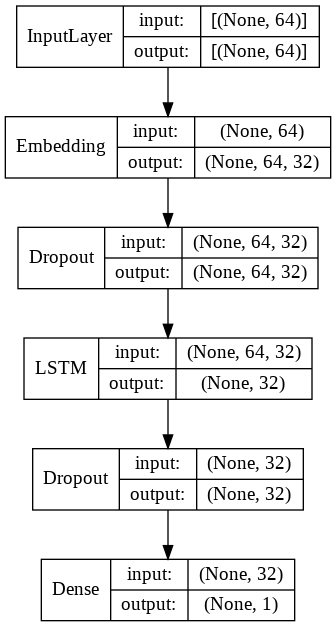

In [35]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [36]:
y=train_a['polarity'].values
print(len(y))
print(y[:5])

1440000
[1 1 1 1 0]


In [37]:
history = model.fit(
    x=X, y=y,
    batch_size=500, 
    epochs=3, 
    validation_split=0.2,
    verbose=1
)

Epoch 1/3
2304/2304 [==============================] - 992s 430ms/step - loss: 0.4903 - accuracy: 0.7589 - val_loss: 0.4064 - val_accuracy: 0.8131
Epoch 2/3
2304/2304 [==============================] - 991s 430ms/step - loss: 0.3279 - accuracy: 0.8585 - val_loss: 0.4217 - val_accuracy: 0.8073
Epoch 3/3
2304/2304 [==============================] - 994s 431ms/step - loss: 0.2262 - accuracy: 0.9089 - val_loss: 0.4617 - val_accuracy: 0.8000


In [39]:
y_=list(test_a['text'].values)
enc_2 = tokenizer.texts_to_sequences(y_)
enc_2 = sequence.pad_sequences(enc_2, maxlen=max_review_len)
print(enc_2[0])

test_a["polarity"].replace({4: 1, 0: 0}, inplace=True)
yt=test_a['polarity'].values

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   8  40   2 179  39 141   4  43  12 300  53  34
 236  30   1  80   2  44  61  84  53 129]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [40]:
from sklearn.metrics import classification_report
class_names = ["Negative", "Positive"]
predicted_classes = model.predict_classes(enc_2)
print(classification_report(yt, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.79      0.83      0.81     80144
    Positive       0.82      0.78      0.80     79856

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



In [41]:
# Storing the metrics for later comparison

print('*** Evaluation of LSTM Model 2 ***')
precision_lstm2=sklearn.metrics.precision_score(yt,predicted_classes)
recall_lstm2=sklearn.metrics.recall_score(yt,predicted_classes)
f1_score_lstm2=sklearn.metrics.f1_score(predicted_classes, yt, average='macro')
print(precision_lstm2)
print(recall_lstm2)
print(f1_score_lstm2)
print('***')

*** Evaluation of LSTM Model 2 ***
0.8165108665641146
0.7776873372069726
0.8016894823348382
***


2. Removing stop words from the documents

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'und

In [42]:
# function to remove stop words
def remove_sw(l1,stop):
  return [w for w in l1 if not w in stop]

In [43]:
training_2=training_set.loc[(training_set['polarity']==0) | (training_set['polarity']==4)]
training_2=training_2.drop(['date','query','user'], axis=1)
train_a, test_a = train_test_split(training_2, test_size=0.20, random_state=2361)
train_a.shape

(1280000, 3)

In [46]:
X=list(train_a['text'].values)
print(X[0])
# removing stopwords from the list X
X_s=[]
for i in X:
  x=nltk.word_tokenize(i)
  x=remove_sw(x,stop_words)
  sentence = " ".join(x)
  X_s.append(sentence)

print(X_s[0])

allreviews = np.concatenate((train_a['text'], test_a['text']), axis=0)
allreviews=allreviews.tolist()
# print(allreviews[:3])

@scarlettstvitus It helps me to put a bag of ice on top of my head to relieve bad headaches! It helps!   I hope you feel better soon, Scar
@ scarlettstvitus It helps put bag ice top head relieve bad headaches ! It helps ! I hope feel better soon , Scar


In [47]:
enc=[]
tokenizer=Tokenizer(filters='')
tokenizer.fit_on_texts(X_s)

enc=tokenizer.texts_to_sequences(X_s)

In [50]:
X= sequence.pad_sequences(enc, maxlen=max_review_len)

In [51]:
train_a.insert(3,"encoded_list", X.tolist())
train_a["polarity"].replace({4: 1}, inplace=True)
train_a.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,polarity,id,text,encoded_list
1474686,1,2065768709,@scarlettstvitus It helps me to put a bag of i...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
867725,1,1677825607,@tommcfly it's actually law of humans' life......,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
191053,0,1969494477,@ryanseacrest Son of a crap! I thought Adam L...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
266955,0,1989094495,Alright folks I think I'm going to go try and ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1472945,1,2065462631,loves that there's so much Federer love going ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [52]:
# designing the LSTM model
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = max_review_len # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 229, 32)           22132576  
_________________________________________________________________
dropout_4 (Dropout)          (None, 229, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 22,140,929
Trainable params: 22,140,929
Non-trainable params: 0
_________________________________________________________________


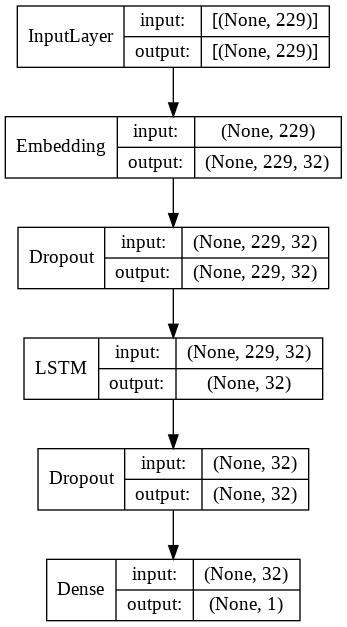

In [53]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [54]:
y=train_a['polarity'].values
print(len(y))
print(y[:5])

1280000
[1 1 0 0 1]


In [55]:
history = model.fit(
    x=X, y=y,
    batch_size=500, 
    epochs=3, 
    validation_split=0.2,
    verbose=1
)

Epoch 1/3
2048/2048 [==============================] - 1174s 572ms/step - loss: 0.5079 - accuracy: 0.7489 - val_loss: 0.4277 - val_accuracy: 0.8013
Epoch 2/3
2048/2048 [==============================] - 1160s 567ms/step - loss: 0.3669 - accuracy: 0.8383 - val_loss: 0.4504 - val_accuracy: 0.7953
Epoch 3/3
2048/2048 [==============================] - 1162s 567ms/step - loss: 0.2708 - accuracy: 0.8867 - val_loss: 0.4902 - val_accuracy: 0.7864


In [56]:
y_=list(test_a['text'].values)
enc_2 = tokenizer.texts_to_sequences(y_)
enc_2 = sequence.pad_sequences(enc_2, maxlen=max_review_len)
print(enc_2[0])

test_a["polarity"].replace({4: 1, 0: 0}, inplace=True)
yt=test_a['polarity'].values

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [57]:
from sklearn.metrics import classification_report
class_names = ["Negative", "Positive"]
predicted_classes = model.predict_classes(enc_2)
print(classification_report(yt, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.76      0.77      0.77    159998
    Positive       0.77      0.75      0.76    160002

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [58]:
# Storing the metrics for later comparison

print('*** Evaluation of LSTM Model 3 ***')
precision_lstm3=sklearn.metrics.precision_score(yt,predicted_classes)
recall_lstm3=sklearn.metrics.recall_score(yt,predicted_classes)
f1_score_lstm3=sklearn.metrics.f1_score(predicted_classes, yt, average='macro')
print(precision_lstm3)
print(recall_lstm3)
print(f1_score_lstm3)
print('***')

*** Evaluation of LSTM Model 3 ***
0.7692577365586257
0.7542718216022299
0.7639870395792925
***


3. Removing user mentions from the tweets

In [59]:
import re

In [ ]:
term = re.compile("r'@\w\b'")

In [61]:
training_2=training_set.loc[(training_set['polarity']==0) | (training_set['polarity']==4)]
training_2=training_2.drop(['date','query','user'], axis=1)
train_a, test_a = train_test_split(training_2, test_size=0.20, random_state=2361)
train_a.shape

(1280000, 3)

In [103]:
X=list(train_a['text'].values)
print(X[0])

m=re.findall(r'\@\w+',X[50])
# print(m)

X_u=[]
for i in X:
  m=re.findall(r'\@\w+',i)
  # x=nltk.word_tokenize(i)
  x=i.split()
  x=remove_sw(x,m)
  X_u.append(x)

print(X_u[0])

allreviews = np.concatenate((train_a['text'], test_a['text']), axis=0)
allreviews=allreviews.tolist()
# print(allreviews[:3])

@scarlettstvitus It helps me to put a bag of ice on top of my head to relieve bad headaches! It helps!   I hope you feel better soon, Scar
['It', 'helps', 'me', 'to', 'put', 'a', 'bag', 'of', 'ice', 'on', 'top', 'of', 'my', 'head', 'to', 'relieve', 'bad', 'headaches!', 'It', 'helps!', 'I', 'hope', 'you', 'feel', 'better', 'soon,', 'Scar']


In [104]:
enc=[]
tokenizer=Tokenizer(filters='')
tokenizer.fit_on_texts(X_u)
enc=tokenizer.texts_to_sequences(X_u)

In [105]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab size {}".format(vocab_size))

max_review_len = len(max((enc), key=len))

print("Maximum review length: {}".format(len(max((enc), key=len))))
print("Minimum review length: {}".format(len(min((enc), key=len))))
result = [len(x) for x in enc]
print("Mean review length: {}".format(np.mean(result)))

vocab size 729161
Maximum review length: 57
Minimum review length: 0
Mean review length: 12.69794453125


In [106]:
X= sequence.pad_sequences(enc, maxlen=max_review_len)

In [107]:
train_a.insert(3,"encoded_list", X.tolist())
train_a["polarity"].replace({4: 1}, inplace=True)
train_a.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,polarity,id,text,encoded_list
1474686,1,2065768709,@scarlettstvitus It helps me to put a bag of i...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
867725,1,1677825607,@tommcfly it's actually law of humans' life......,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
191053,0,1969494477,@ryanseacrest Son of a crap! I thought Adam L...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
266955,0,1989094495,Alright folks I think I'm going to go try and ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1472945,1,2065462631,loves that there's so much Federer love going ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [108]:
# designing the LSTM model
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = max_review_len # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 57, 32)            23333152  
_________________________________________________________________
dropout_6 (Dropout)          (None, 57, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 23,341,505
Trainable params: 23,341,505
Non-trainable params: 0
_________________________________________________________________


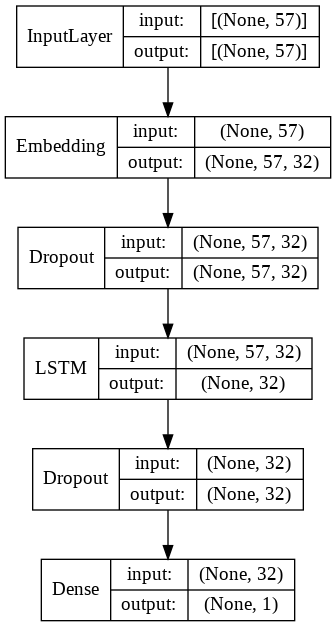

In [109]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [110]:
y=train_a['polarity'].values
print(len(y))
print(y[:5])

1280000
[1 1 0 0 1]


In [111]:
history = model.fit(
    x=X, y=y,
    batch_size=500, 
    epochs=3, 
    validation_split=0.2,
    verbose=1
)

Epoch 1/3
2048/2048 [==============================] - 651s 317ms/step - loss: 0.4966 - accuracy: 0.7539 - val_loss: 0.4142 - val_accuracy: 0.8094
Epoch 2/3
2048/2048 [==============================] - 638s 311ms/step - loss: 0.3606 - accuracy: 0.8405 - val_loss: 0.4167 - val_accuracy: 0.8114
Epoch 3/3
2048/2048 [==============================] - 633s 309ms/step - loss: 0.2900 - accuracy: 0.8772 - val_loss: 0.4402 - val_accuracy: 0.8053


In [112]:
y_=list(test_a['text'].values)
enc_2 = tokenizer.texts_to_sequences(y_)
enc_2 = sequence.pad_sequences(enc_2, maxlen=max_review_len)
print(enc_2[0])

test_a["polarity"].replace({4: 1, 0: 0}, inplace=True)
yt=test_a['polarity'].values

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8
  40   2 179  39 141   4  43  12 300  53  34 236  30   1  80   2  44  61
  84  53 129]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [113]:
from sklearn.metrics import classification_report
class_names = ["Negative", "Positive"]
predicted_classes = model.predict_classes(enc_2)
print(classification_report(yt, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81    159998
    Positive       0.81      0.79      0.80    160002

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



In [114]:
# Storing the metrics for later comparison

print('*** Evaluation of LSTM Model 4 ***')
precision_lstm4=sklearn.metrics.precision_score(yt,predicted_classes)
recall_lstm4=sklearn.metrics.recall_score(yt,predicted_classes)
f1_score_lstm4=sklearn.metrics.f1_score(predicted_classes, yt, average='macro')
print(precision_lstm4)
print(recall_lstm4)
print(f1_score_lstm4)
print('***')

*** Evaluation of LSTM Model 4 ***
0.8128049833398354
0.7943088211397358
0.8056592705637082
***


Observation:

Comparing the four implementations of LSTMs in this notebook with metrics in the order (precision, recall, F1):
1. 80% training data (0.8209127594287364, 0.764121698478769, 0.7984684144190074)
2. 90% training data (0.8165108665641146, 0.7776873372069726, 0.8016894823348382)
3. Removal of all stop words (0.7692577365586257, 0.7542718216022299, 0.7639870395792925)
4. Removal of specific words such as user mentions (0.8128049833398354, 0.7943088211397358, 0.8056592705637082),

The first model does a fine job in achieveing ~82% precision, ~76% recall along with ~79% F1 score. The second model also achieves a nearly similar score with a performance difference of <= 1 to 2%. This is to suggest that a 10% increase in the training data does not necessarily imply improvement in performance. It in fact saw a dip of 1% on each metric whoch could be due to quality of the data itself.

The third model sees a sharp dip of ~ 1% to 4% on each metric. This is operating on the default split of 80% training data. So this implies that removal of stop words may have in fact caused loss of context resulting in the drop in scores.

The last model indicates that removal of specific strings strings such as user mentions may aid the model better in comparison to removal of huge subset of words like stop words. In this case removal of user mentions helps reduce the noise in data without hampering the context of the reviews.